<a href="https://colab.research.google.com/github/Nourou2024/Analyse_Performance_Commerciale/blob/main/Analyse_Exploratoire_des_Donn%C3%A9es_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


import pandas as pd

# Assuming 'creditcard.csv' is in your current working directory.
# If it's in a different directory, replace './creditcard.csv' with the full path.
try:
  df = pd.read_csv('./creditcard.csv')
  print(df.head()) # Display the first few rows to confirm import

except FileNotFoundError:
  print("Error: 'creditcard.csv' not found in the current directory. Please check the file path.")
except pd.errors.ParserError:
  print("Error: Could not parse 'creditcard.csv'. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
# prompt: Peux tu me decrire la base des donnees creditcard.csv?

import pandas as pd

# Assuming 'creditcard.csv' is in your current working directory.
# If it's in a different directory, replace './creditcard.csv' with the full path.
try:
    df = pd.read_csv('./creditcard.csv')

    # Display basic info
    print(df.info())  # Column names, data types, non-null counts
    print("\n")
    print(df.describe()) # Summary statistics for numerical columns
    print("\n")
    print(df.head()) # First few rows of the DataFrame

except FileNotFoundError:
    print("Error: 'creditcard.csv' not found in the current directory. Please check the file path.")
except pd.errors.ParserError:
    print("Error: Could not parse 'creditcard.csv'. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17918 entries, 0 to 17917
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    17918 non-null  int64  
 1   V1      17918 non-null  float64
 2   V2      17918 non-null  float64
 3   V3      17918 non-null  float64
 4   V4      17918 non-null  float64
 5   V5      17917 non-null  float64
 6   V6      17917 non-null  float64
 7   V7      17917 non-null  float64
 8   V8      17917 non-null  float64
 9   V9      17917 non-null  float64
 10  V10     17917 non-null  float64
 11  V11     17917 non-null  float64
 12  V12     17917 non-null  float64
 13  V13     17917 non-null  float64
 14  V14     17917 non-null  float64
 15  V15     17917 non-null  float64
 16  V16     17917 non-null  float64
 17  V17     17917 non-null  float64
 18  V18     17917 non-null  float64
 19  V19     17917 non-null  float64
 20  V20     17917 non-null  float64
 21  V21     17917 non-null  float64
 22

Comment analyser les transactions bancaires pour identifier
des schémas de fraude ?

In [5]:
# prompt: data.describe()

# Assuming df is already defined and loaded from 'creditcard.csv' in the previous code

print(df.describe())


               Time            V1            V2            V3            V4  \
count  17918.000000  17918.000000  17918.000000  17918.000000  17918.000000   
mean   13905.276259     -0.244970      0.258166      0.777804      0.291614   
std     9867.916251      1.893161      1.508296      1.766872      1.479519   
min        0.000000    -30.552380    -40.978852    -31.103685     -5.172595   
25%     3781.250000     -0.959806     -0.305367      0.338327     -0.629972   
50%    12347.500000     -0.306803      0.235061      0.924255      0.230058   
75%    23775.000000      1.164015      0.876538      1.557391      1.155770   
max    29031.000000      1.960497     16.713389      4.101716     11.927512   

                 V5            V6            V7            V8            V9  \
count  17917.000000  17917.000000  17917.000000  17917.000000  17917.000000   
mean      -0.146329      0.099878     -0.150970      0.012969      0.734707   
std        1.423917      1.327756      1.342027    

In [7]:

# Calculer la proportion de valeurs manquantes pour chaque variable
missing_values = df.isnull().sum() / len(df)

# Trier les variables par proportion de valeurs manquantes (du plus grand au plus petit)
missing_values_sorted = missing_values.sort_values(ascending=False)

# Afficher le tableau des proportions de valeurs manquantes
missing_values_sorted


V6        0.000056
V5        0.000056
V11       0.000056
V10       0.000056
V9        0.000056
V8        0.000056
V7        0.000056
V13       0.000056
V12       0.000056
V14       0.000056
V19       0.000056
V18       0.000056
V17       0.000056
V16       0.000056
V15       0.000056
V23       0.000056
V24       0.000056
V25       0.000056
V26       0.000056
V27       0.000056
V20       0.000056
V21       0.000056
V22       0.000056
Amount    0.000056
V28       0.000056
Class     0.000056
V2        0.000000
V3        0.000000
V1        0.000000
V4        0.000000
Time      0.000000
dtype: float64


In [8]:


import pandas as pd

# Assuming 'creditcard.csv' is in your current working directory.
# If it's in a different directory, replace './creditcard.csv' with the full path.
try:
    df = pd.read_csv('./creditcard.csv')

    # Remove rows with any missing values
    df_cleaned = df.dropna()

    # Display the first few rows of the cleaned DataFrame
    print(df_cleaned.head())

    # You can now save the cleaned DataFrame to a new CSV file if needed:
    # df_cleaned.to_csv('cleaned_creditcard.csv', index=False)

except FileNotFoundError:
    print("Error: 'creditcard.csv' not found in the current directory. Please check the file path.")
except pd.errors.ParserError:
    print("Error: Could not parse 'creditcard.csv'. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

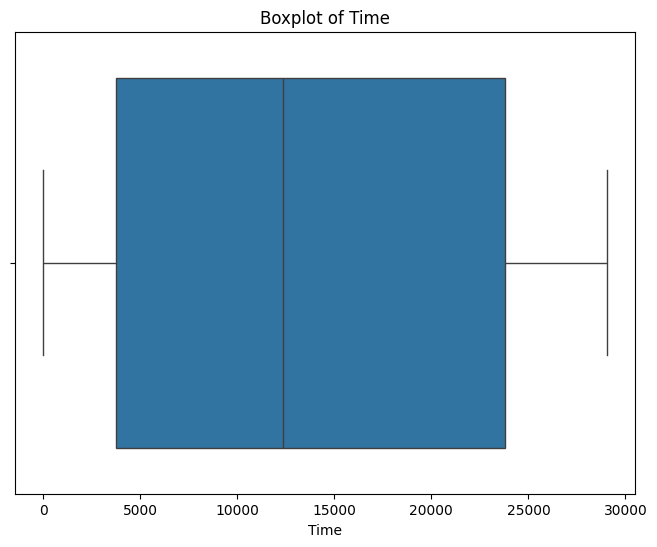

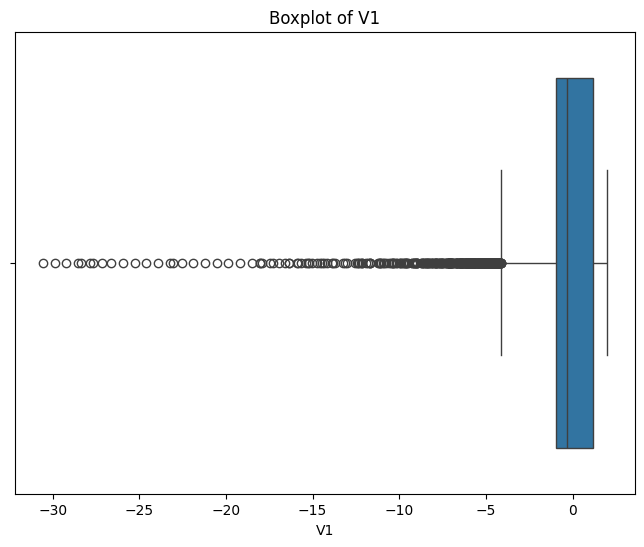

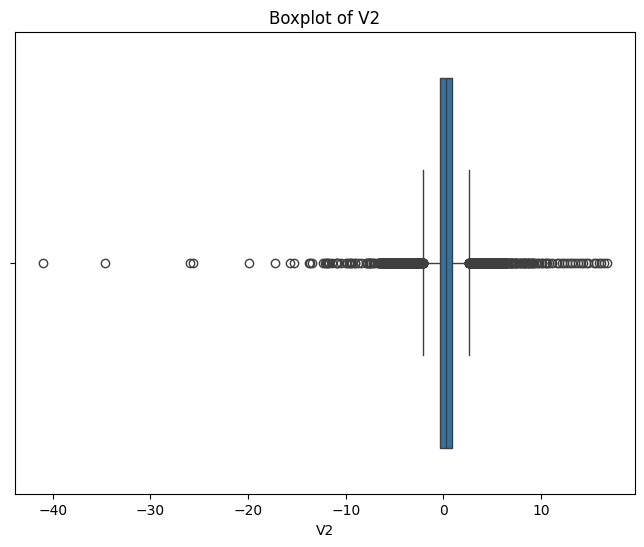

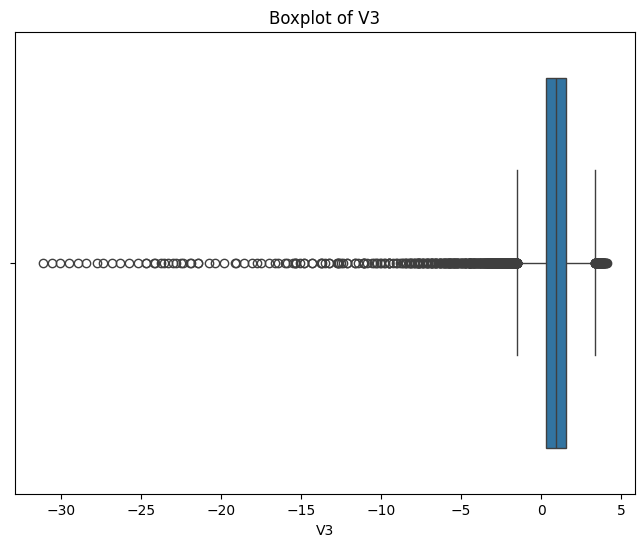

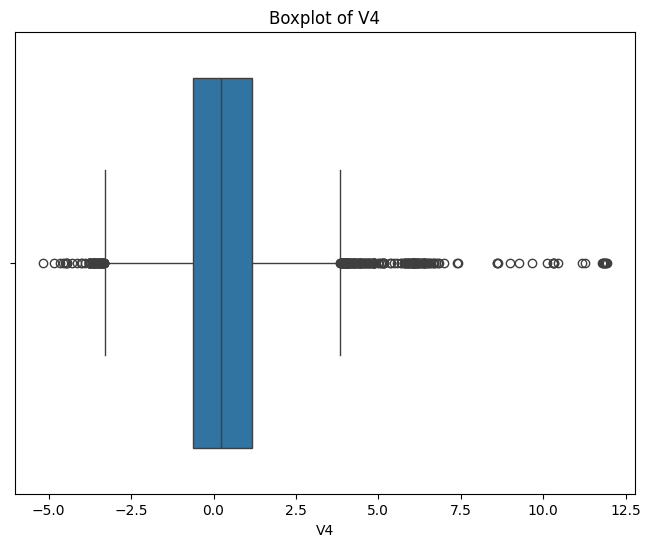

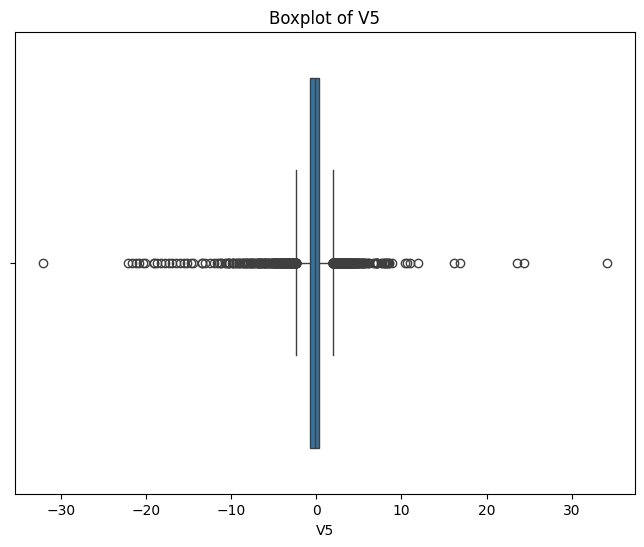

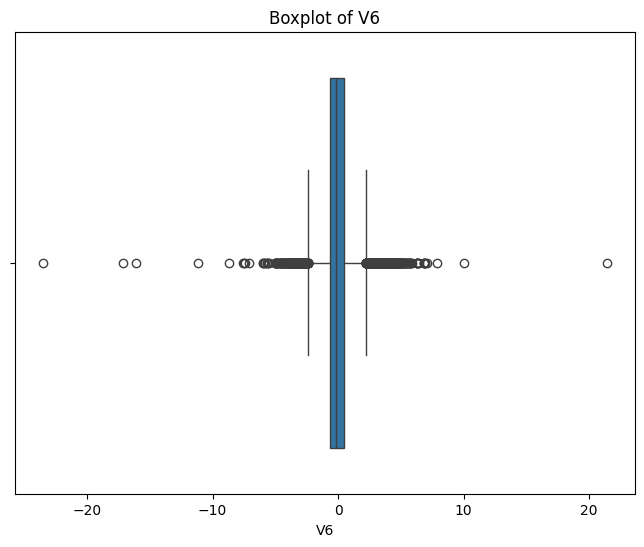

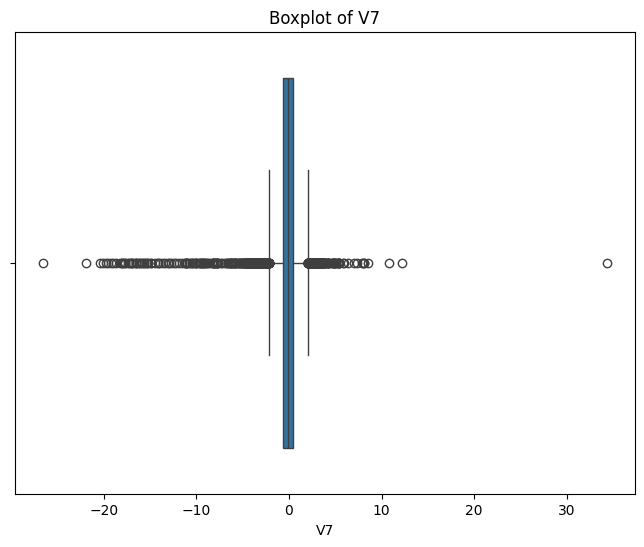

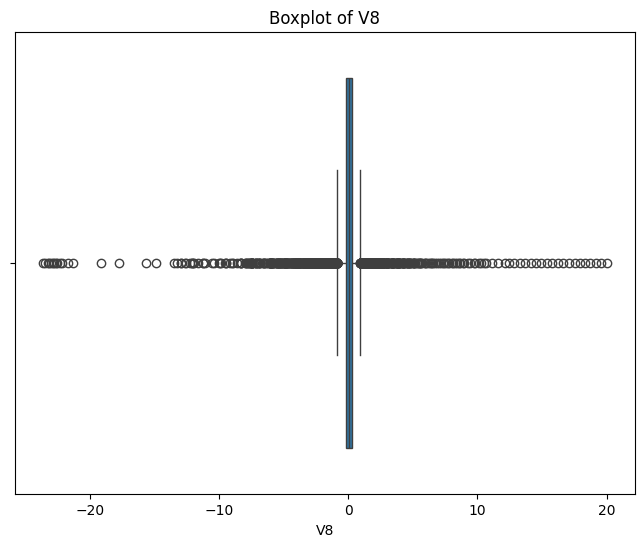

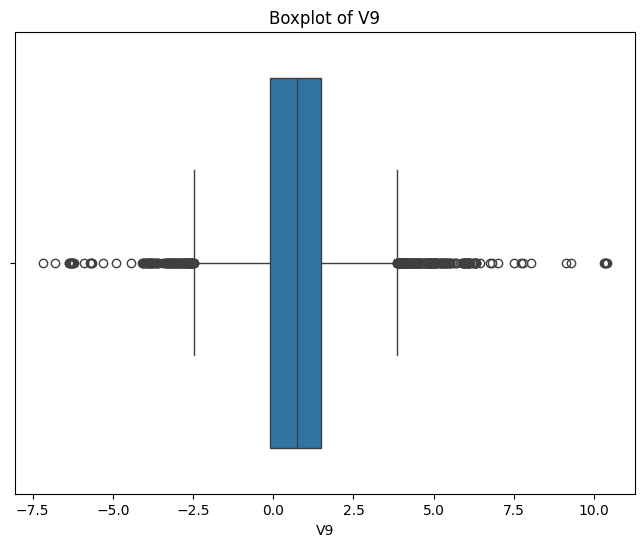

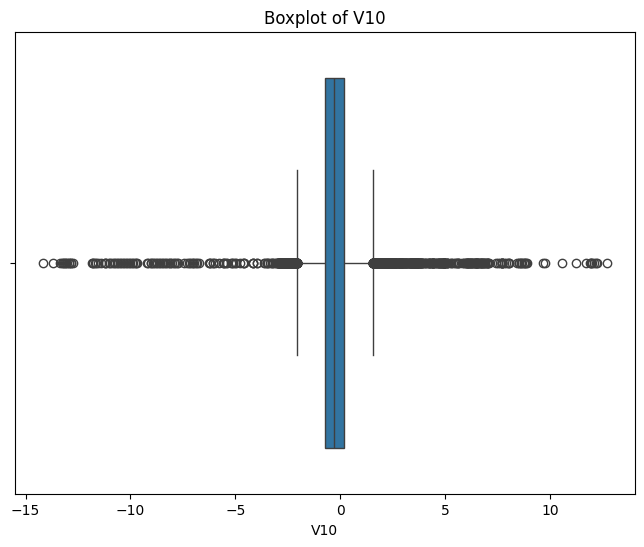

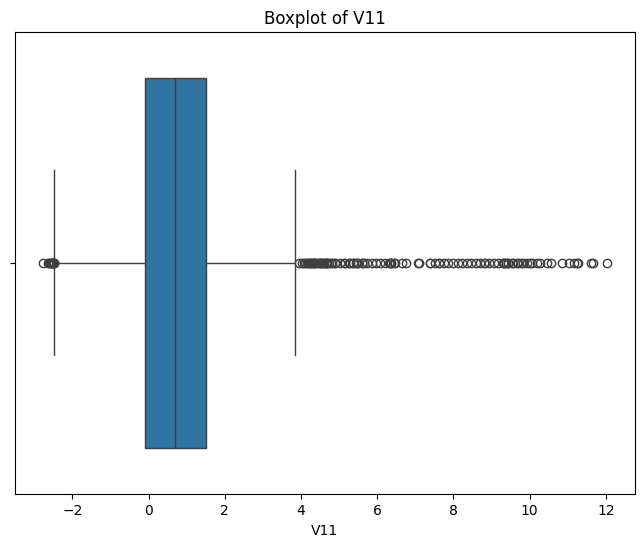

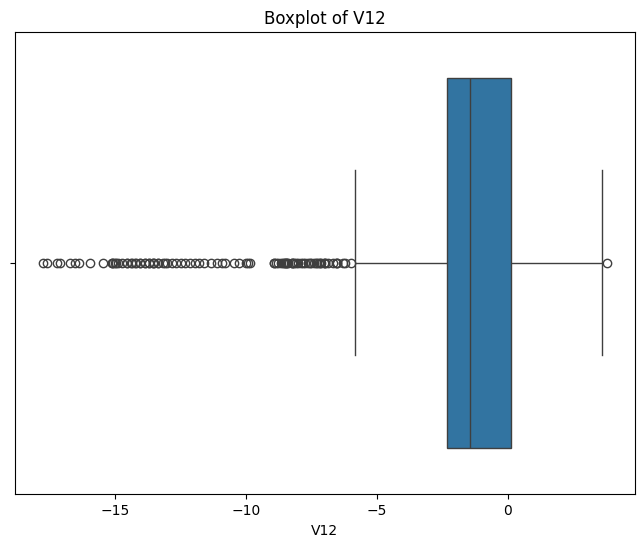

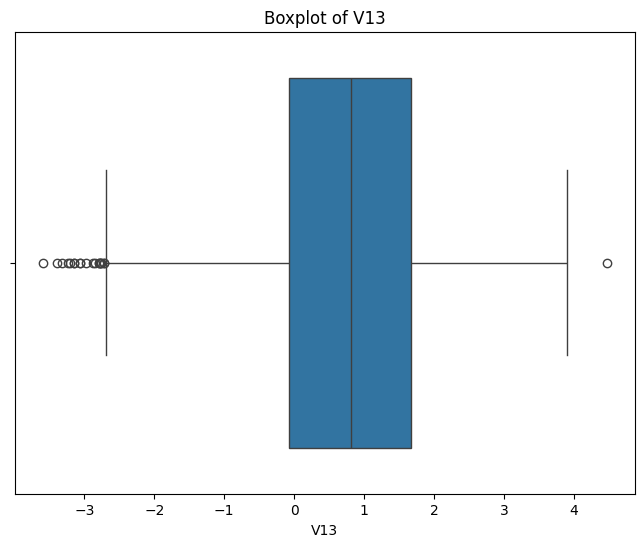

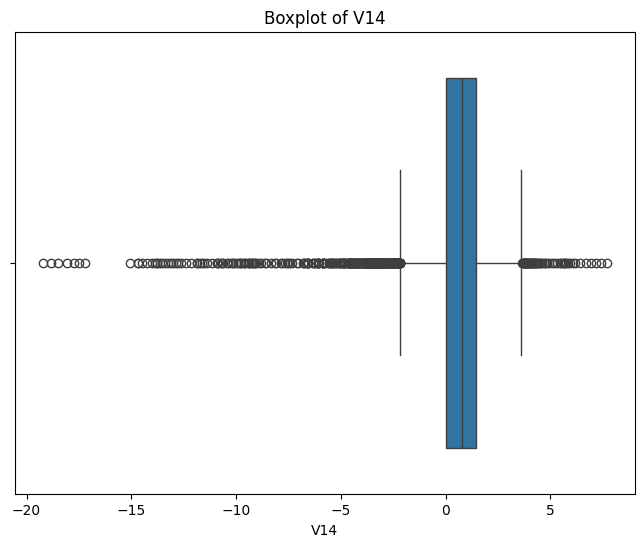

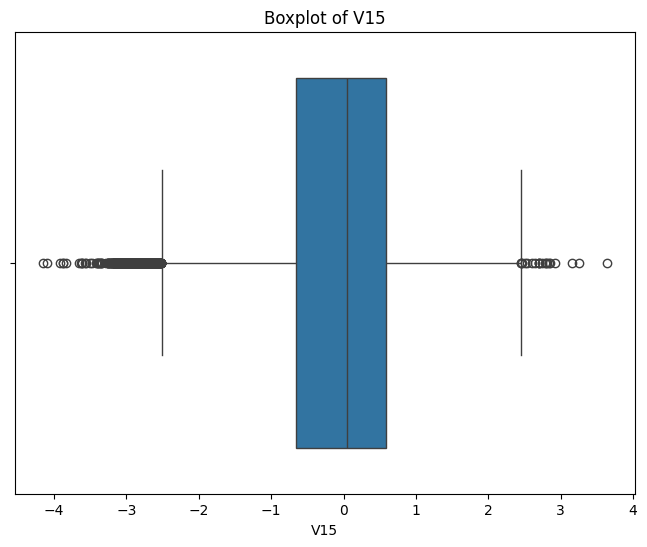

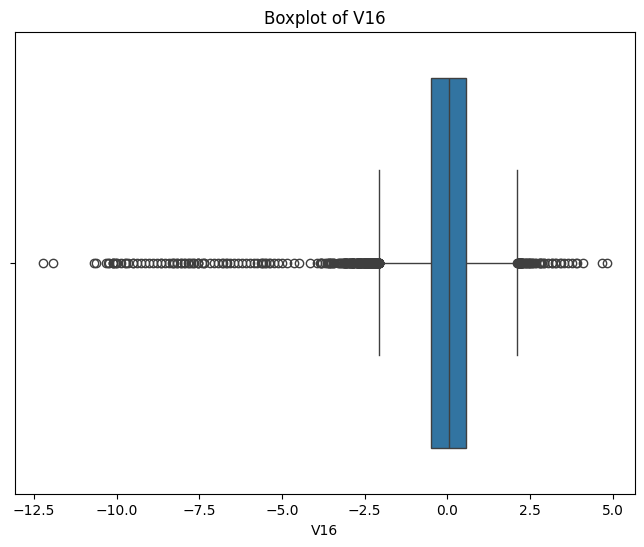

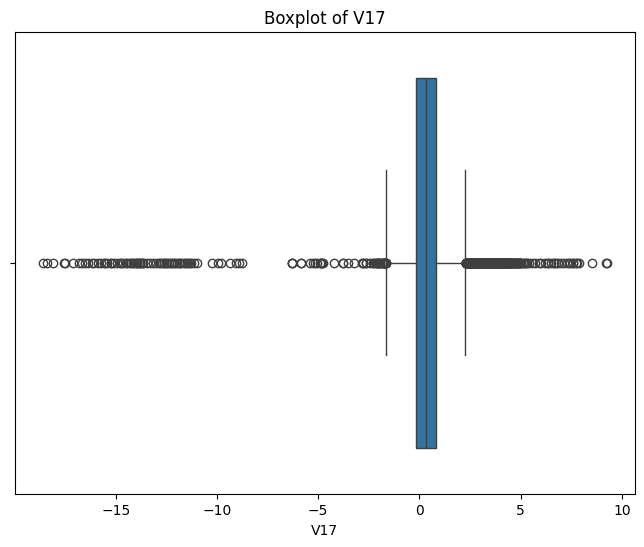

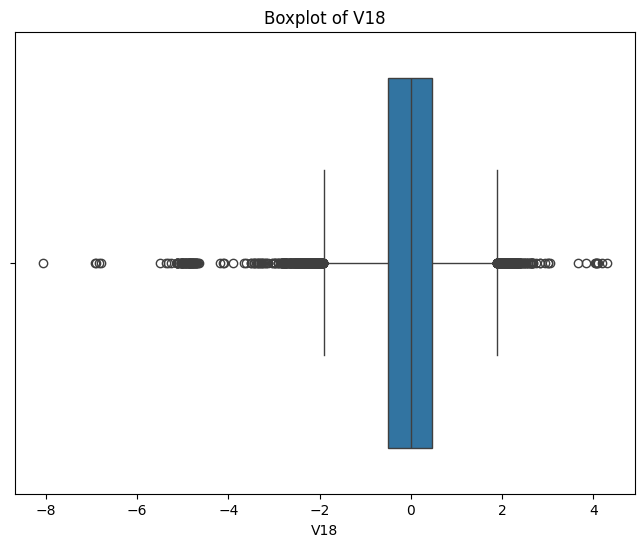

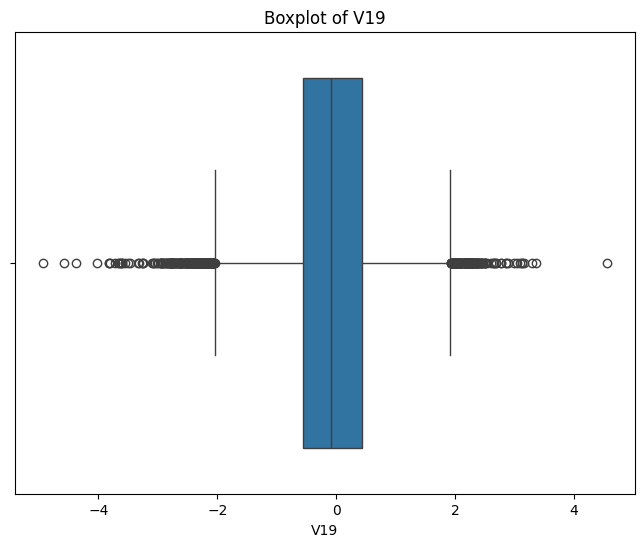

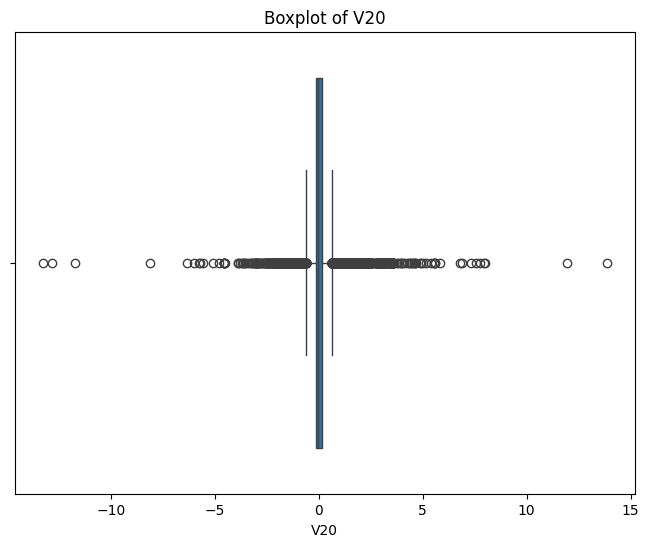

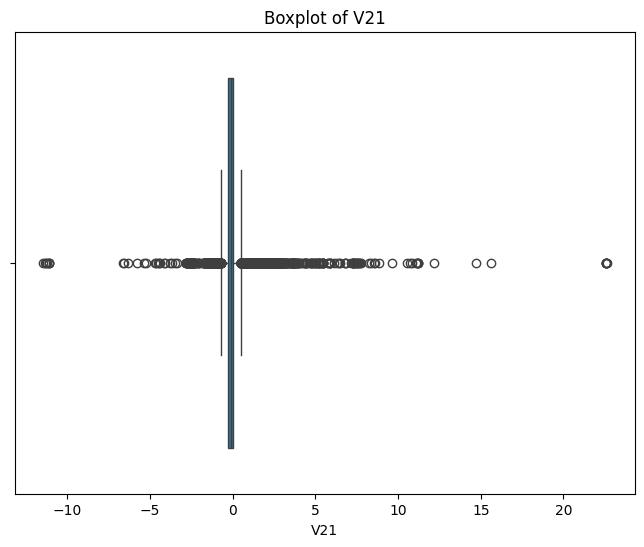

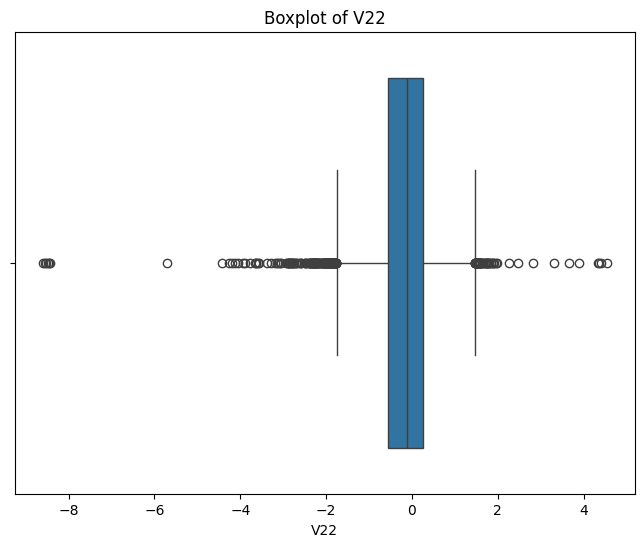

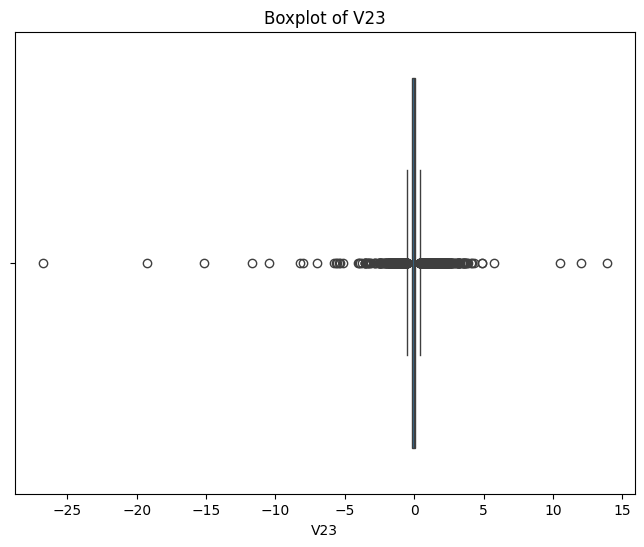

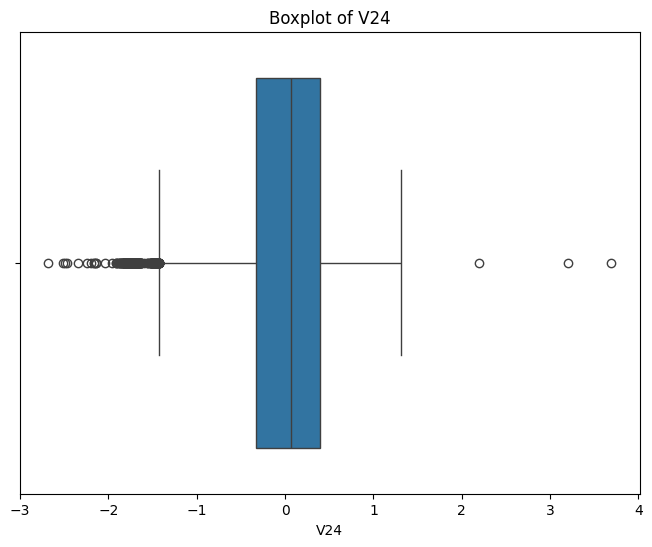

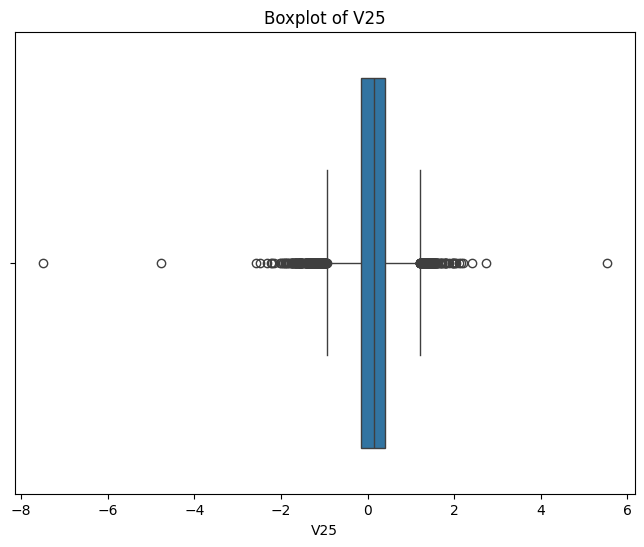

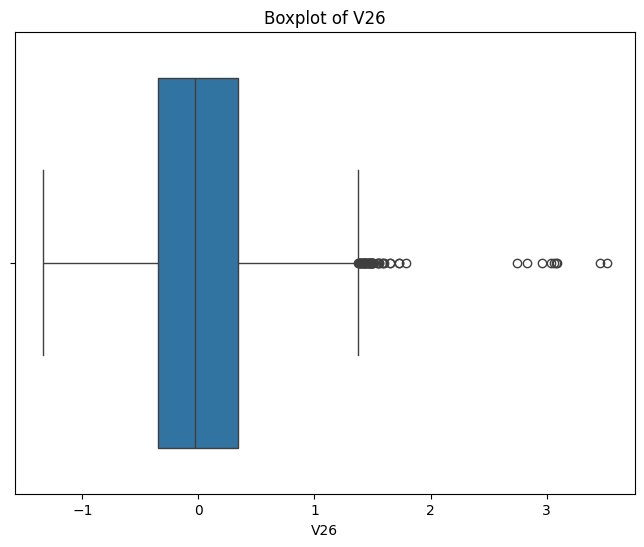

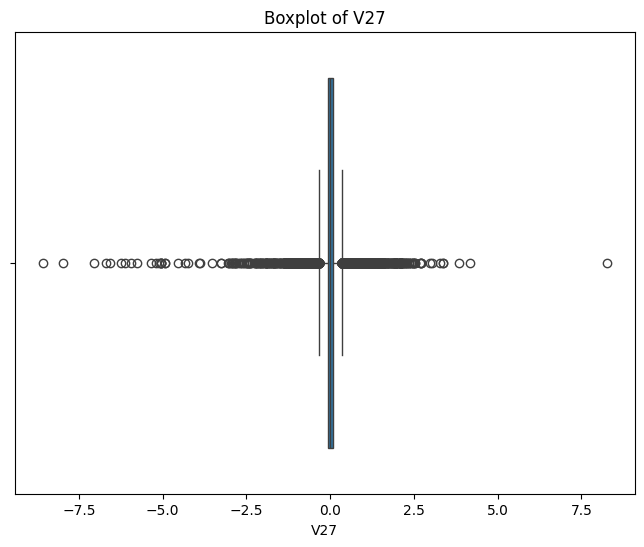

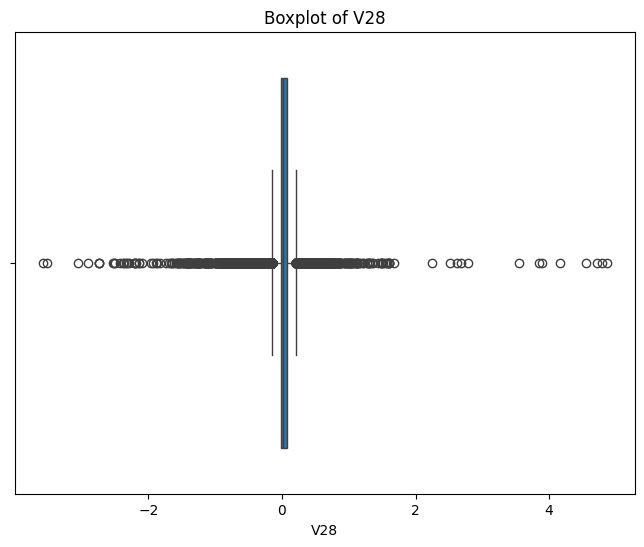

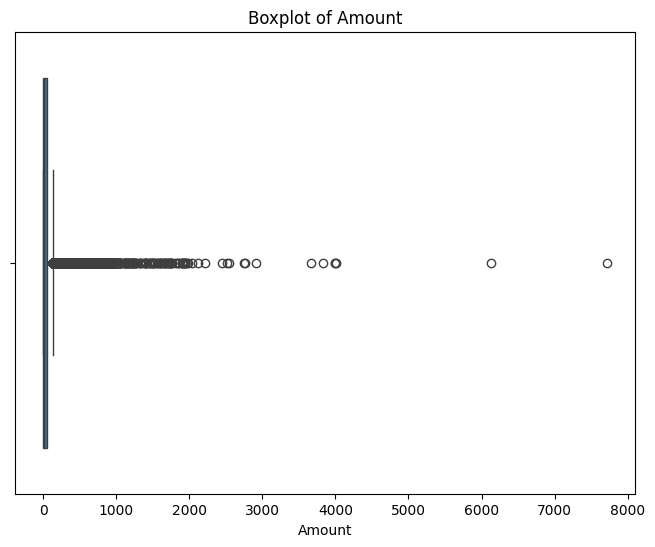

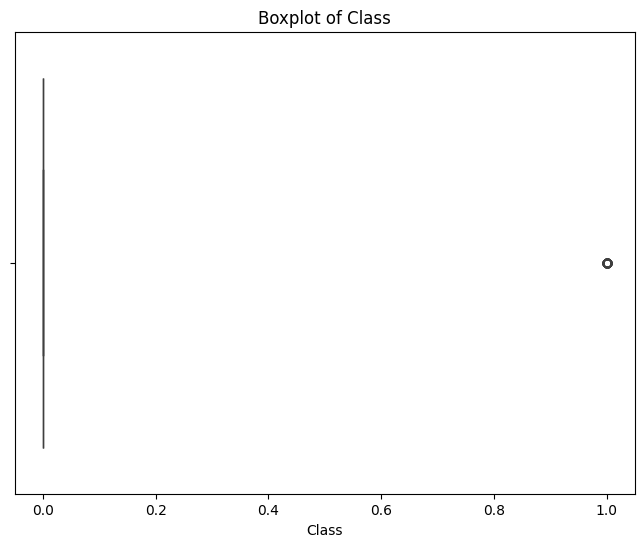

In [9]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'creditcard.csv' is in your current working directory.
# If it's in a different directory, replace './creditcard.csv' with the full path.
try:
    df = pd.read_csv('./creditcard.csv')

    # Identify numerical columns
    numerical_cols = df.select_dtypes(include=['number']).columns

    # Create boxplots for each numerical column
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))  # Adjust figure size as needed
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()

except FileNotFoundError:
    print("Error: 'creditcard.csv' not found in the current working directory. Please check the file path.")
except pd.errors.ParserError:
    print("Error: Could not parse 'creditcard.csv'. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


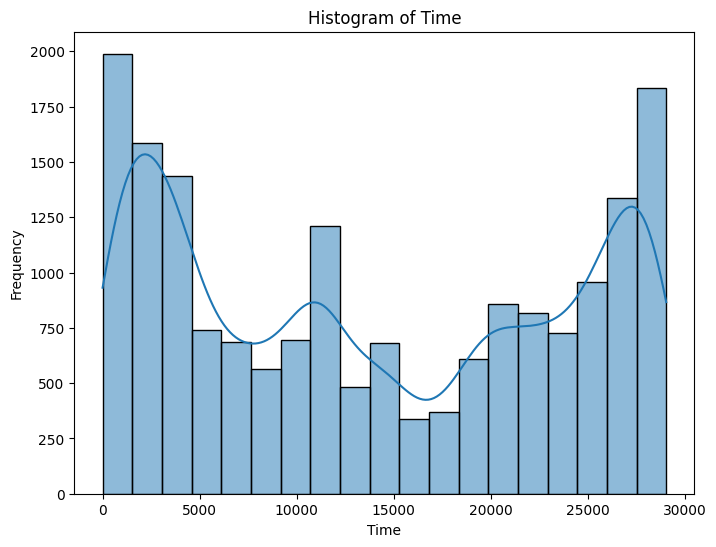

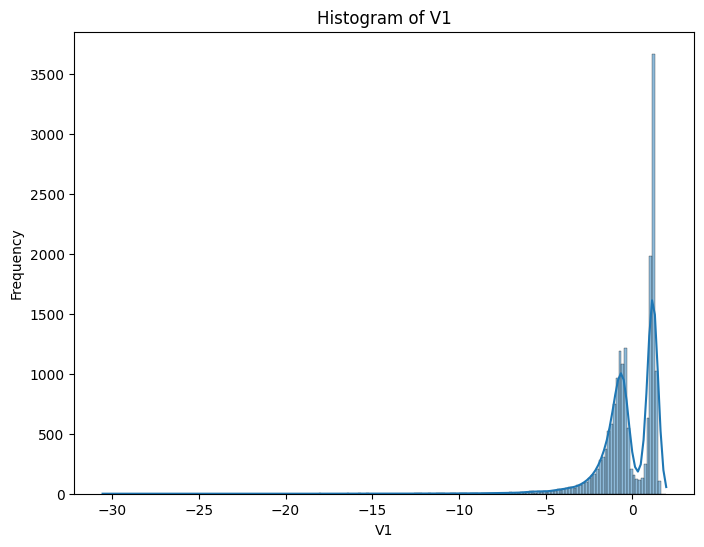

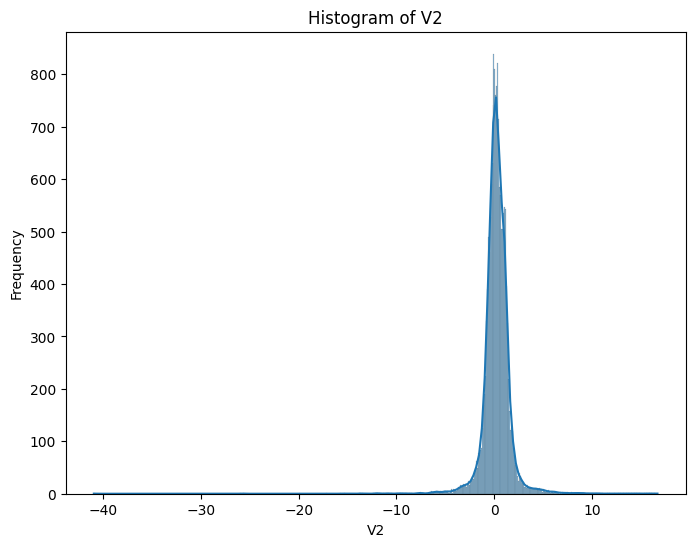

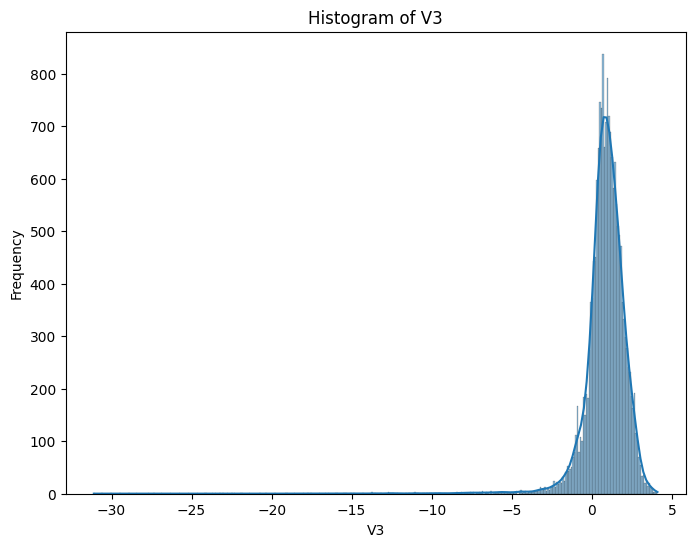

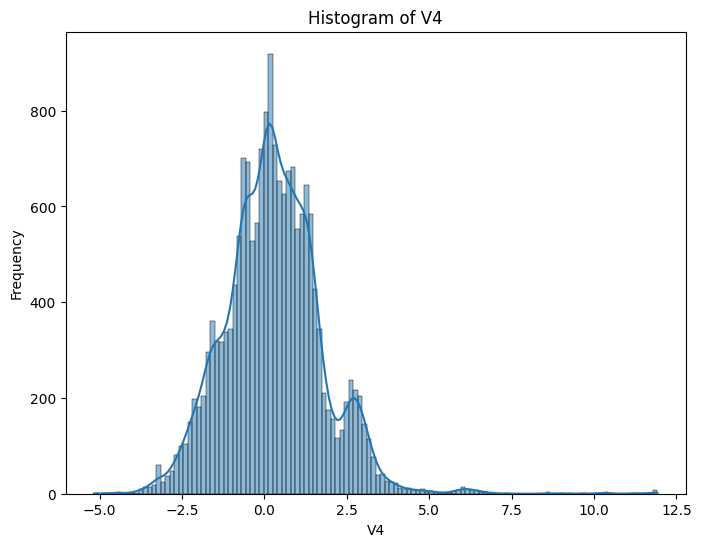

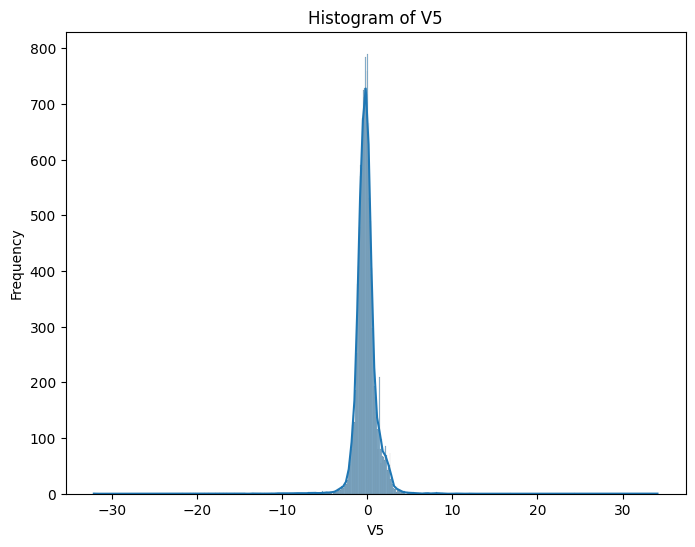

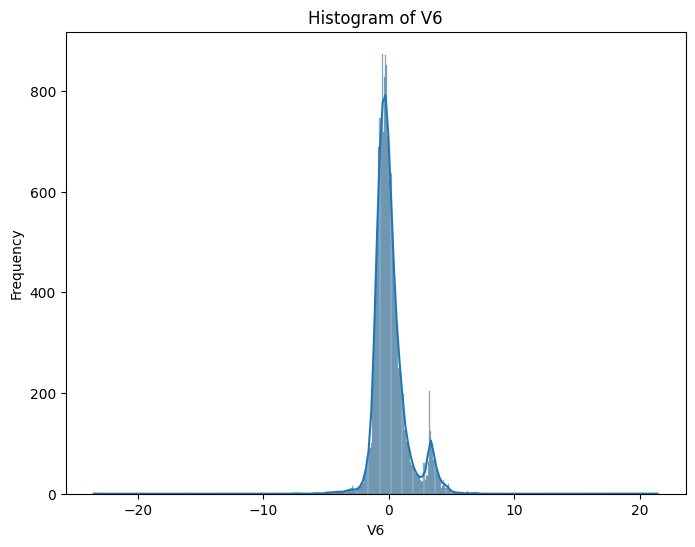

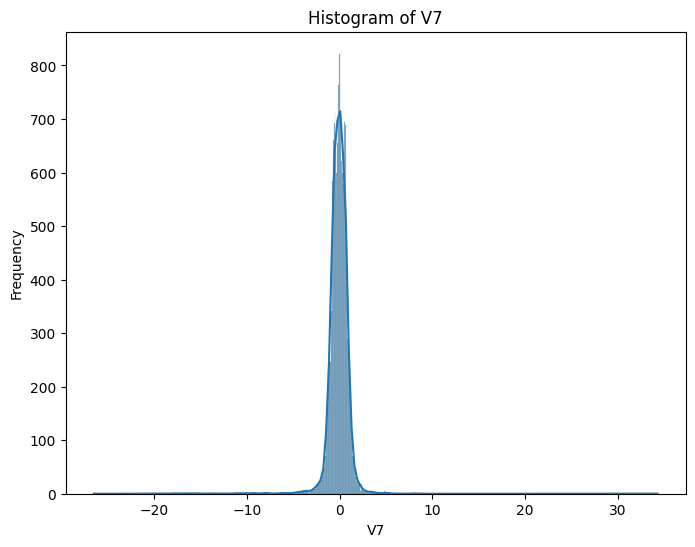

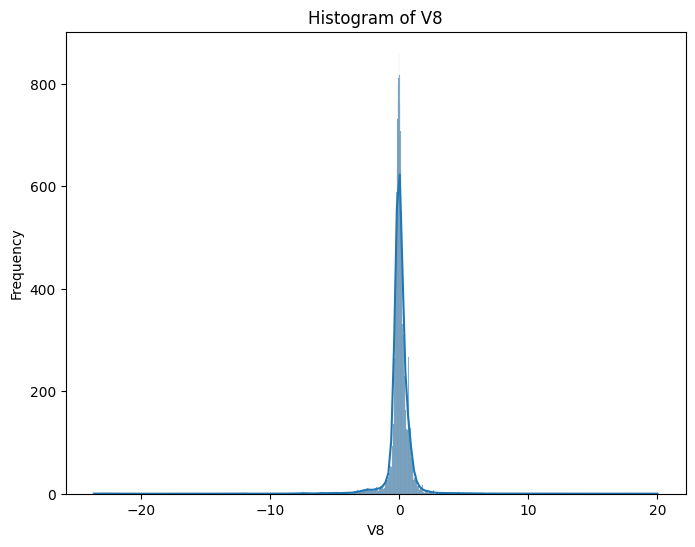

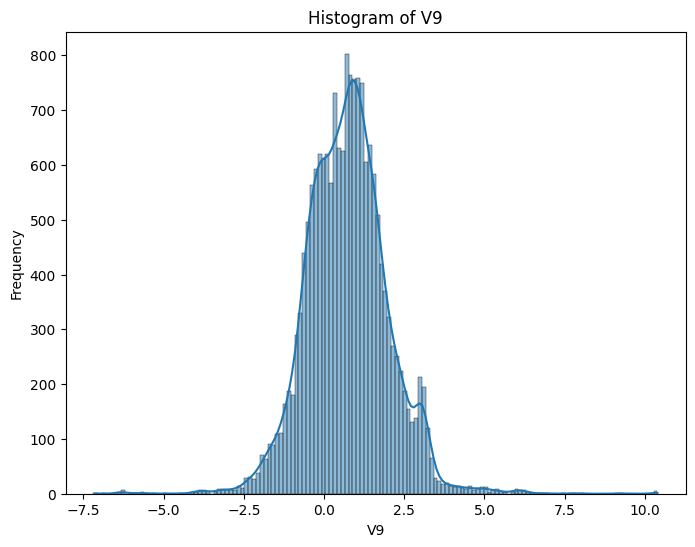

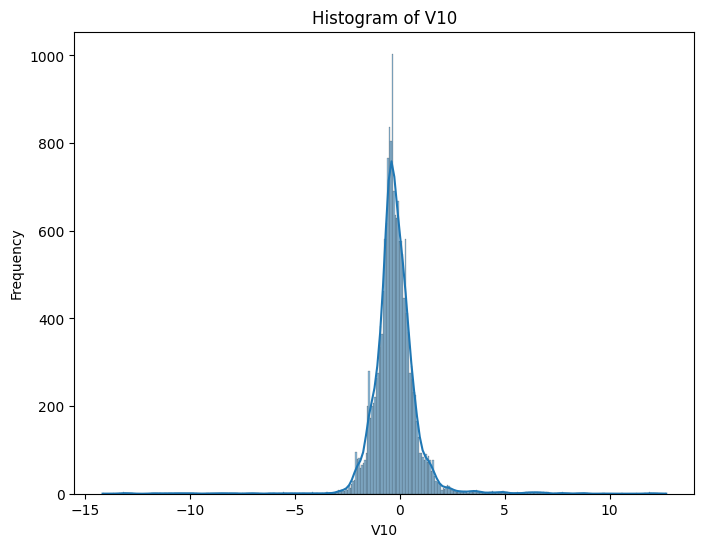

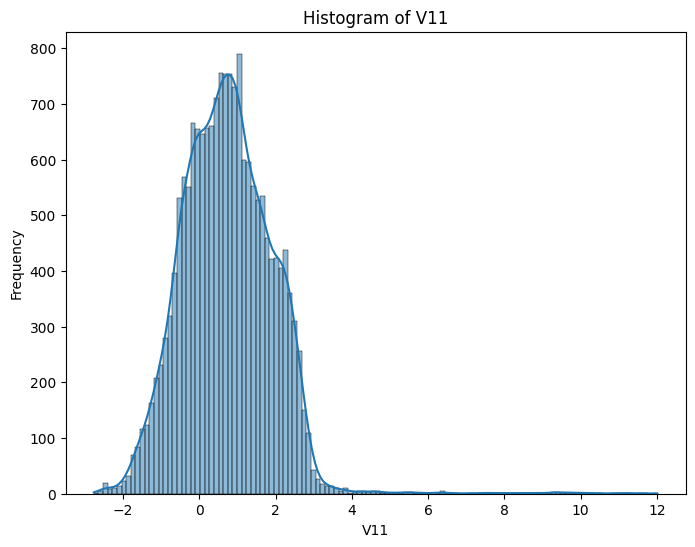

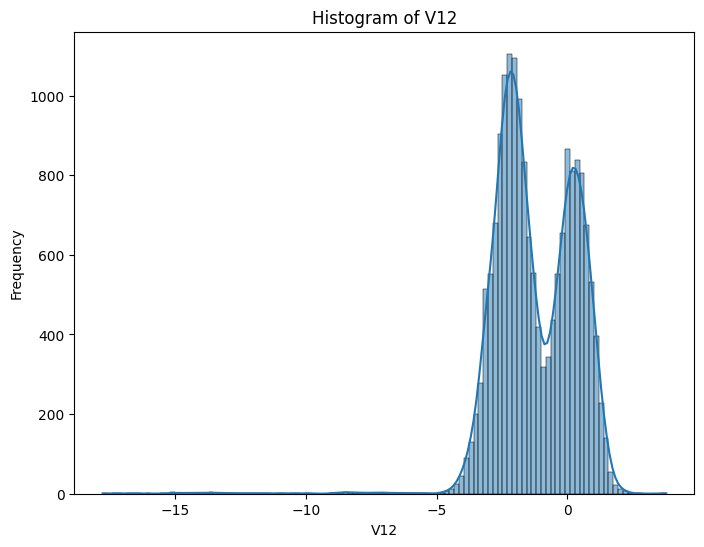

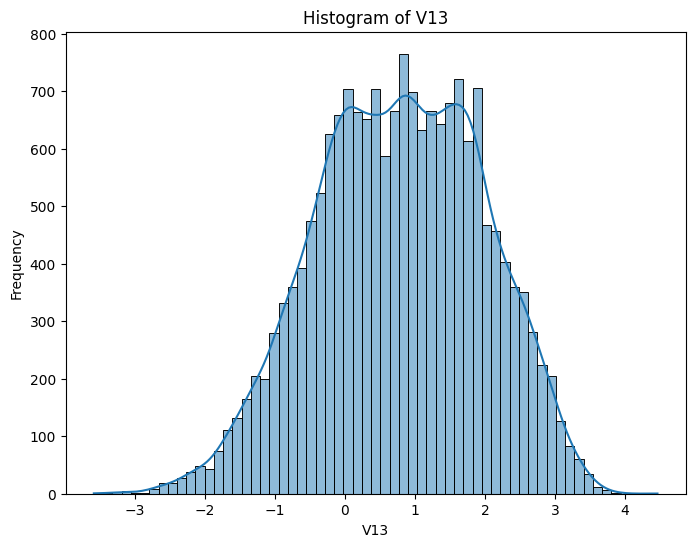

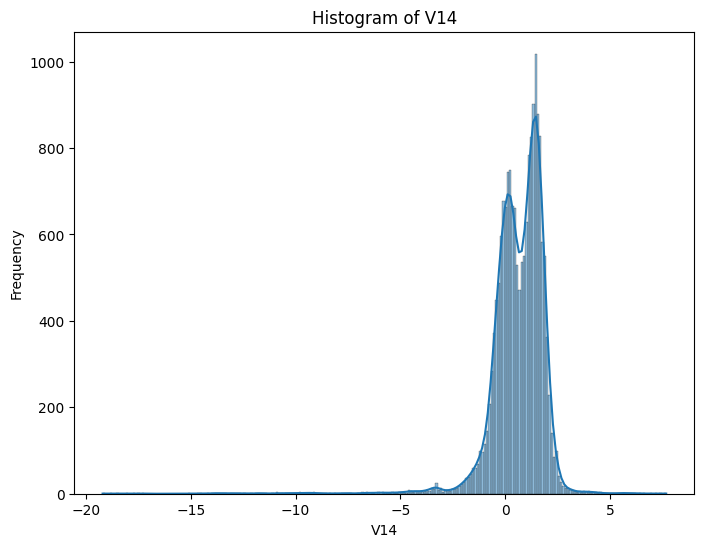

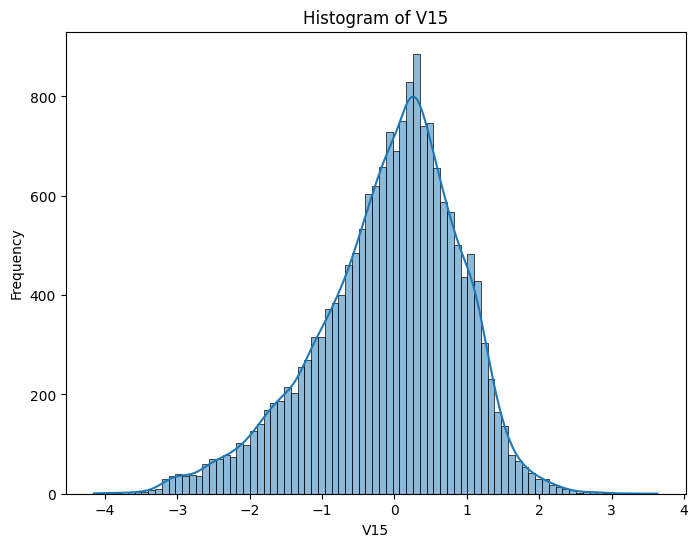

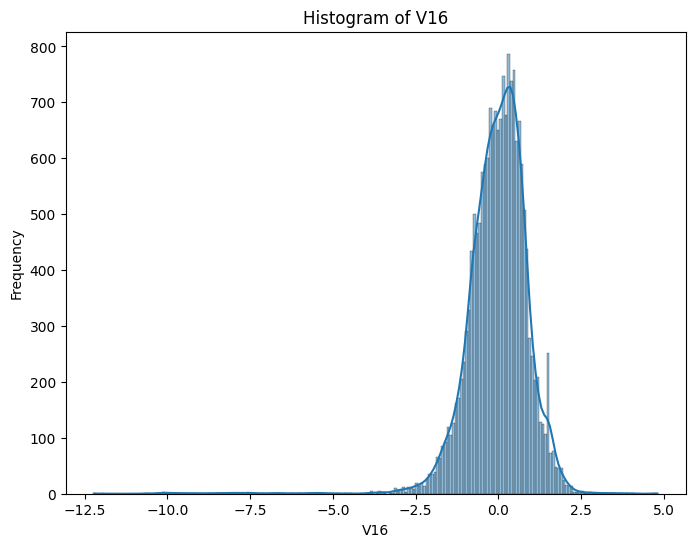

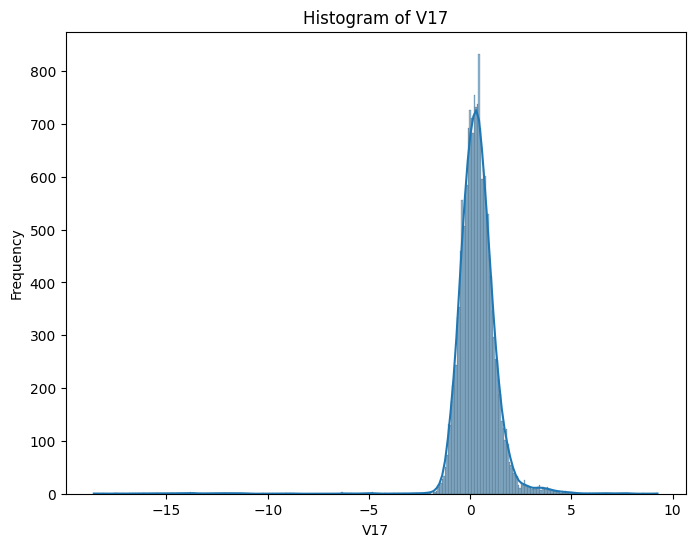

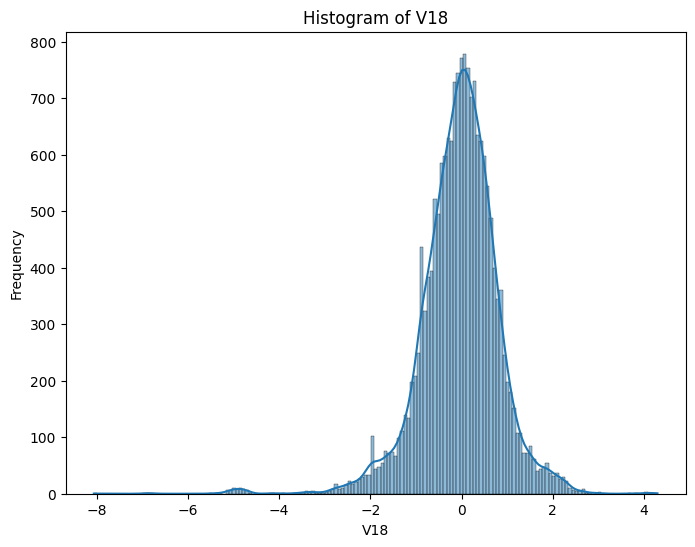

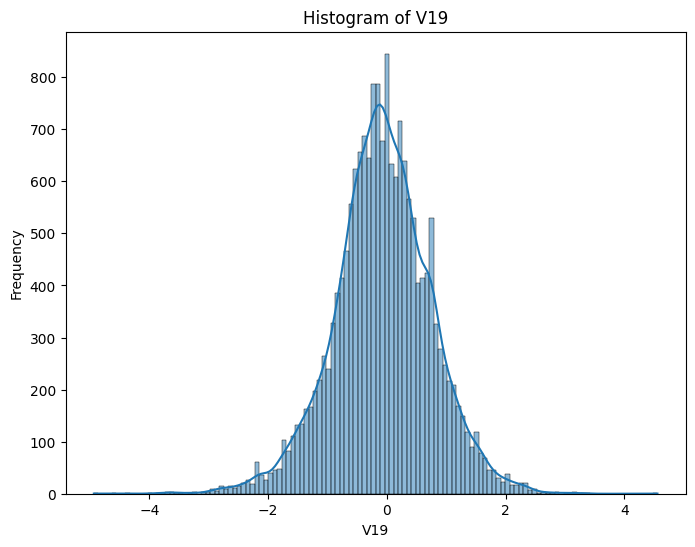

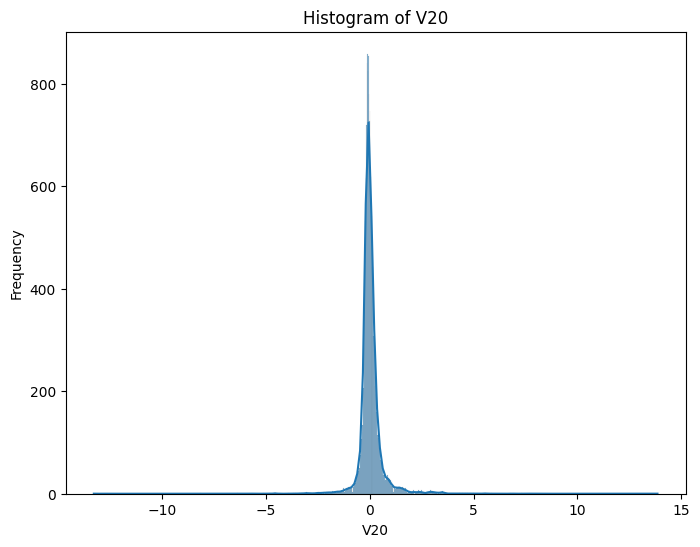

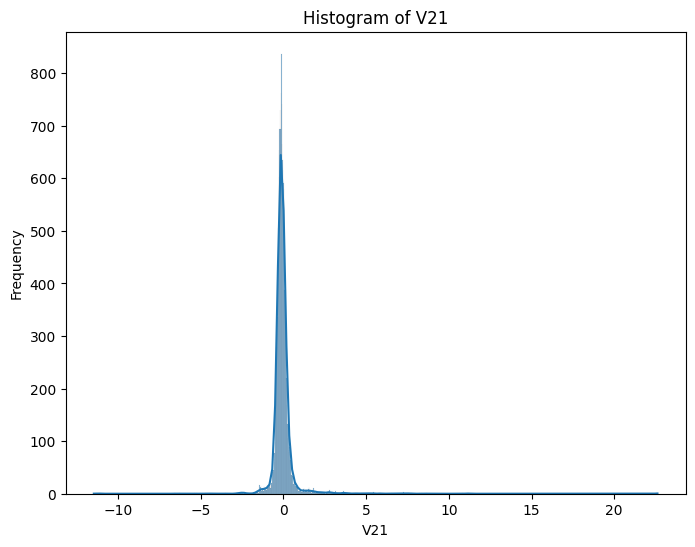

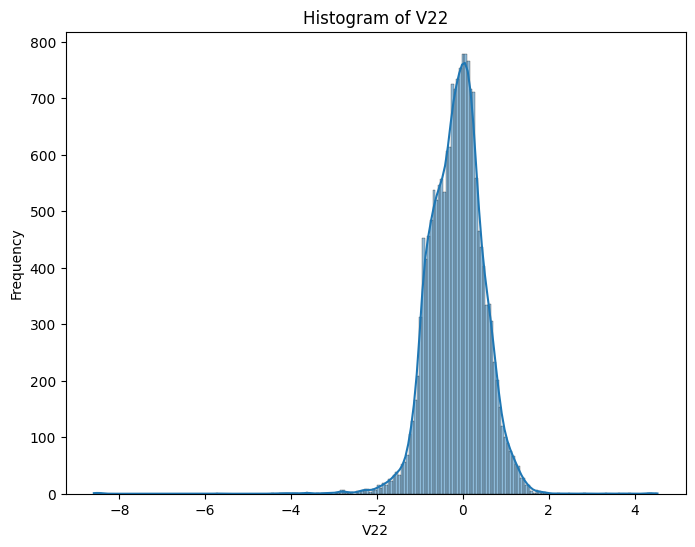

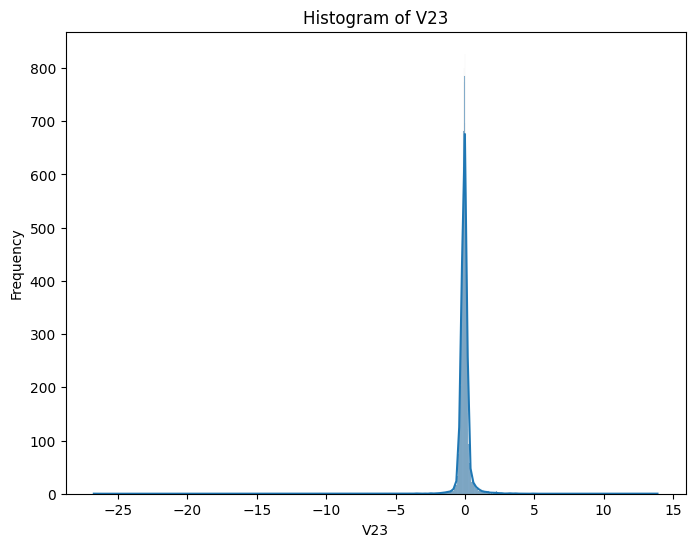

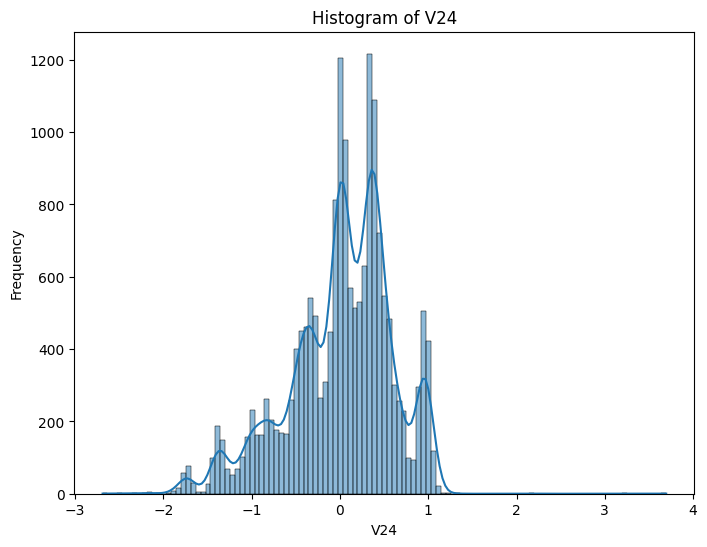

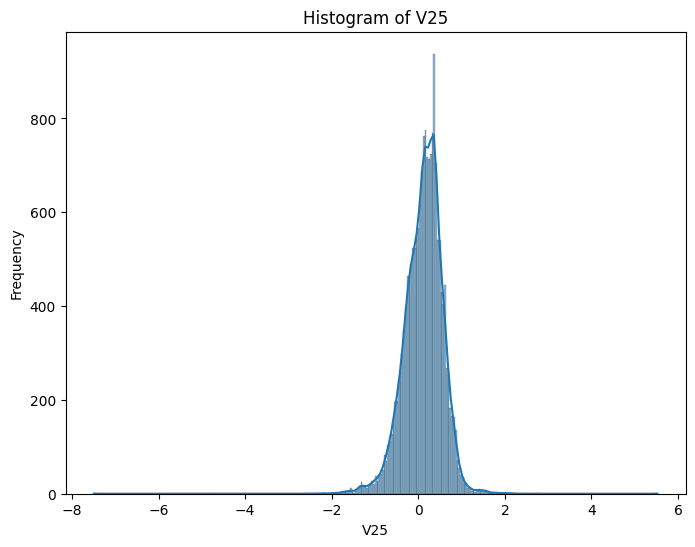

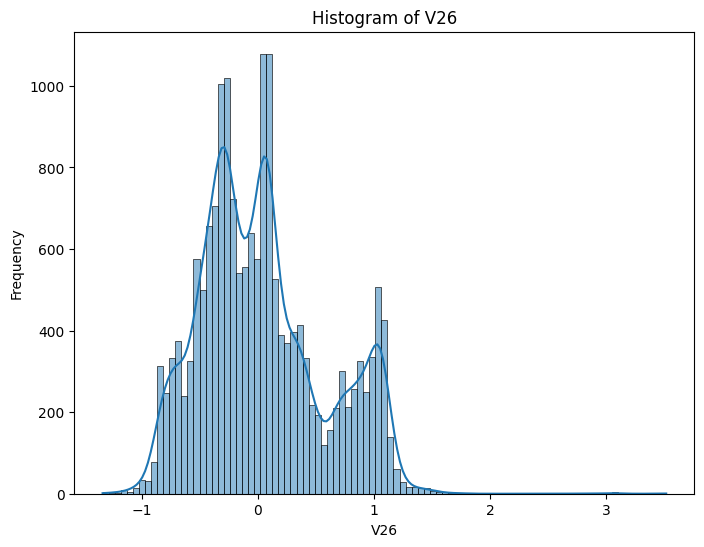

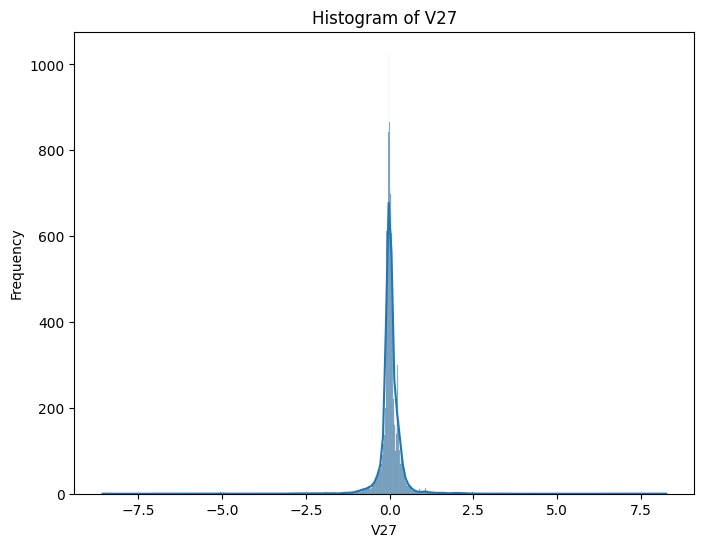

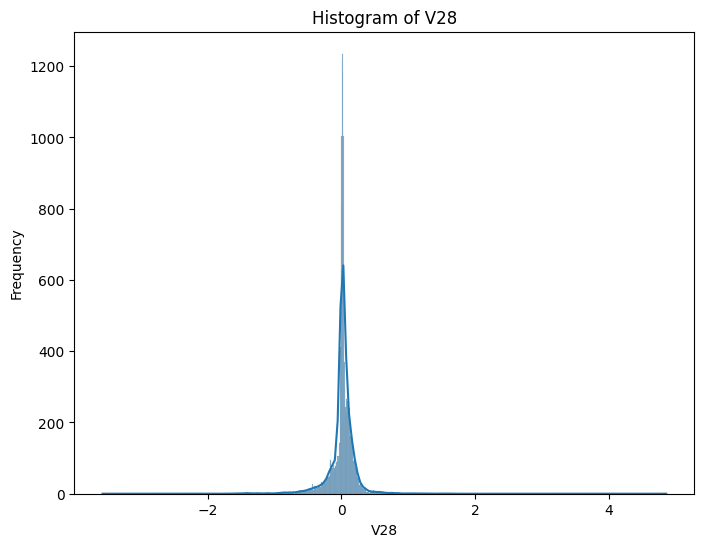

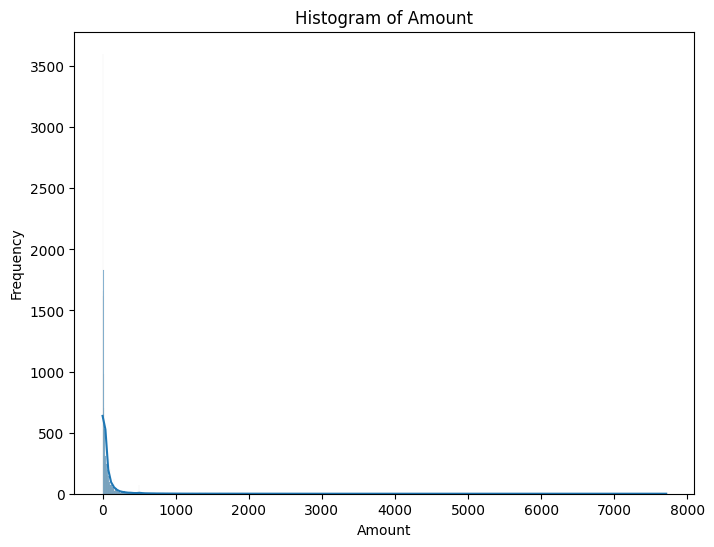

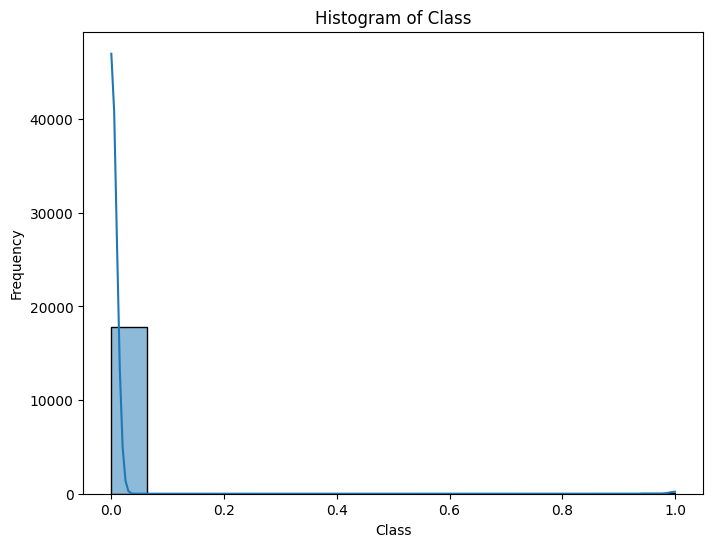

In [10]:

# Assuming 'creditcard.csv' and necessary libraries are already imported and df is defined.
try:
    # Identify numerical columns
    numerical_cols = df.select_dtypes(include=['number']).columns

    # Create histograms for each numerical column
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))  # Adjust figure size as needed
        sns.histplot(df[col], kde=True) # Use histplot with kde for density curve
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

except Exception as e:
    print(f"An unexpected error occurred: {e}")


In [11]:
# prompt: Comment analyser les transactions bancaires pour identifier
# des schémas de fraude de notre base de donnees?

# ... (previous code)

# Analyse des transactions pour identifier des schémas de fraude

# 1. Analyse exploratoire des données (EDA) approfondie :
#    - Examiner la distribution des montants de transaction pour les transactions frauduleuses et légitimes.
#    - Analyser les caractéristiques des transactions frauduleuses par rapport aux transactions légitimes (par exemple, heure de la transaction, emplacement géographique).
#    - Créer des visualisations (histogrammes, boxplots, scatter plots) pour identifier les valeurs aberrantes et les tendances suspectes.

# 2. Analyse des variables temporelles:
#    - Explorer les transactions dans le temps pour détecter des pics inattendus d'activité frauduleuse.
#    - Analyser les fréquences des transactions et les montants pour identifier des motifs suspects.

# 3. Analyse des corrélations :
#   - Calculer la matrice de corrélation entre toutes les caractéristiques et analyser les corrélations élevées entre les variables pour mieux comprendre les relations entre les différentes fonctionnalités.

# 4. Détection d'anomalies :
#    - Utiliser des algorithmes de détection d'anomalies (par exemple, isolation forest, one-class SVM) pour identifier les transactions qui s'écartent significativement du comportement normal.
#    - Définir des seuils pour les scores d'anomalies afin de classer les transactions comme frauduleuses ou non.

# 5. Techniques de Machine Learning :
#    - Entraîner des modèles de classification (par exemple, régression logistique, forêts aléatoires, réseaux de neurones) pour prédire la probabilité de fraude pour chaque transaction.
#    - Optimiser les modèles en utilisant des techniques de validation croisée et ajuster les hyperparamètres pour améliorer la performance.

# Exemple avec IsolationForest (à compléter avec d'autres algorithmes) :
from sklearn.ensemble import IsolationForest

# Sélectionner les caractéristiques pertinentes pour l'analyse
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'Amount'] #Remplacer par les colonnes pertinentes de votre DataFrame

# Préparer les données
X = df[features]

# Initialiser et entrainer le modèle
model = IsolationForest(contamination='auto', random_state=42)  # Ajuster contamination au besoin
model.fit(X)

# Prédire les scores d'anomalies
df['anomaly_score'] = model.decision_function(X)
df['anomaly'] = model.predict(X)

# Analyser les transactions avec un score d'anomalie bas
print(df[df['anomaly'] == -1])

# Visualiser les résultats
# ...


# Continuez à explorer et à analyser les données pour identifier les schémas et les caractéristiques des transactions frauduleuses
# et affinez vos techniques d'analyse et les modèles machine learning correspondants.



        Time        V1        V2        V3        V4        V5        V6  \
18        14 -5.401258 -5.450148  1.186305  1.736239  3.049106 -1.763406   
51        36 -1.004929 -0.985978 -0.038039  3.710061 -6.631951  5.122103   
82        52 -3.005237  2.600138  1.483691 -2.418473  0.306326 -0.824575   
85        55 -4.575093 -4.429184  3.402585  0.903915  3.002224 -0.491078   
89        59 -0.773293 -4.146007 -0.932038  0.027094 -1.698307  0.460188   
...      ...       ...       ...       ...       ...       ...       ...   
17852  28975 -2.798246  4.050961 -2.576940  0.482415  0.955521 -1.759198   
17861  28984 -2.447654  2.597053  1.424029  0.886223  0.399922  1.205326   
17885  29004 -2.208709 -5.903145 -1.217802  1.601412 -2.230520  1.326392   
17892  29008 -0.999558 -1.022561  2.011569 -0.685867 -2.599713  1.702756   
17916  29030 -2.844632  3.717960 -7.165428  4.120419 -2.991039 -2.942326   

             V7        V8        V9  ...       V23       V24       V25  \
18    -1.5597

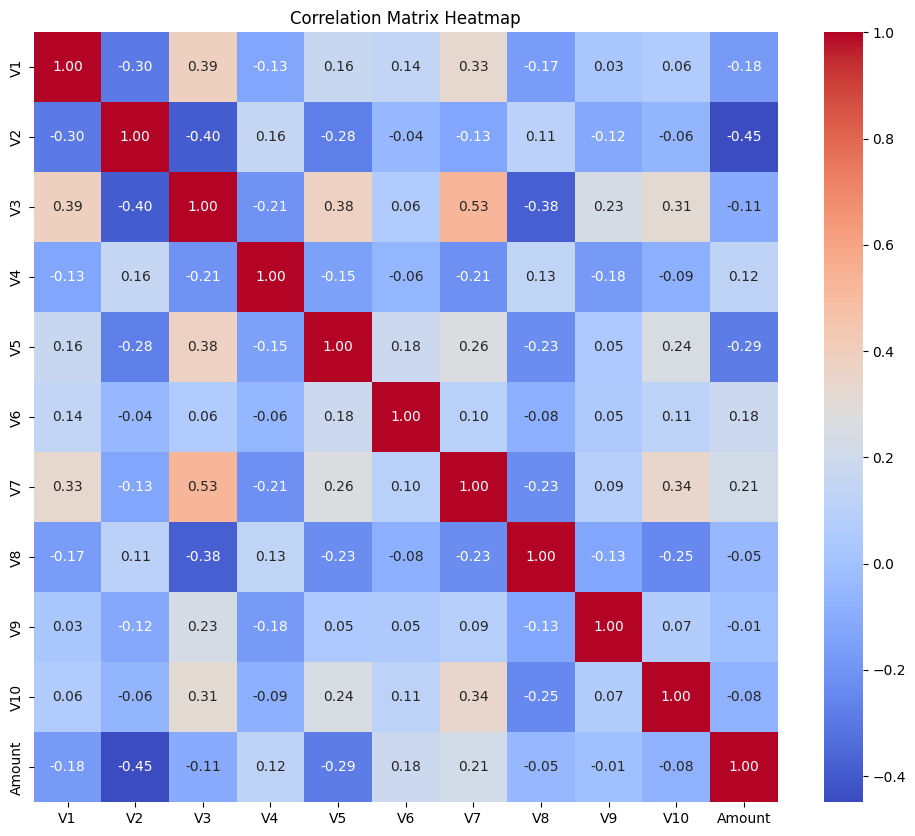

In [12]:


import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and you've already selected the relevant features
# Example: features = ['V1', 'V2', 'V3', 'V4', 'V5', 'Amount']

# Assuming 'df' is already loaded with the 'creditcard.csv'
try:
  # Example using a correlation matrix for a heatmap
  plt.figure(figsize=(12, 10))
  correlation_matrix = df[features].corr()  # Calculate the correlation matrix
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") # Create the heatmap
  plt.title('Correlation Matrix Heatmap')
  plt.show()

except NameError:
  print("Error: 'df' or 'features' is not defined. Please make sure to load the DataFrame and select features first.")
except KeyError:
    print("Error: One or more features specified in 'features' are not columns in your DataFrame. Please review your features list")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 99.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 89.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


2025-04-04 14:03:16.533 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-04 14:03:16.684 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-04-04 14:03:16.688 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-04 14:03:16.689 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-04 14:03:16.690 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-04 14:03:16.691 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-04 14:03:16.692 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-04 14:03:16.693 Thread 'MainThread': mi

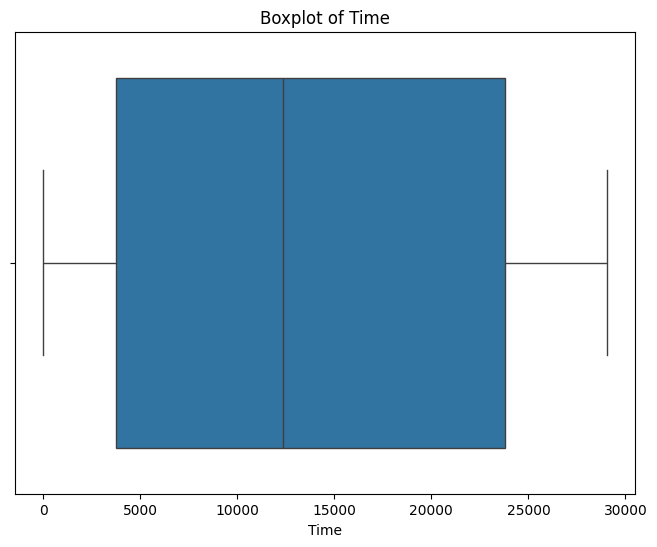

In [14]:
# prompt: Déploiement d’un tableau de bord interactif : Création d'applications
# de data visualisation avec Streamlit.

!pip install streamlit
!pip install pyngrok

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

# Load your dataset (replace with your actual file path if needed)
try:
    df = pd.read_csv('./creditcard.csv')
except FileNotFoundError:
    st.error("Error: 'creditcard.csv' not found. Please upload the file.")
    st.stop() # Stop execution if the file is not found

# Streamlit app
st.title('Interactive Dashboard for Fraud Detection')

# Display basic data information
if st.checkbox('Display Data Information'):
    st.subheader('Data Information')
    st.write(df.info())
    st.write(df.describe())

# Data visualization options
visualization_option = st.selectbox('Select Visualization', ['Boxplots', 'Histograms', 'Correlation Matrix', 'Anomaly Detection'])

if visualization_option == 'Boxplots':
  numerical_cols = df.select_dtypes(include=['number']).columns
  selected_column = st.selectbox("Select a numerical feature", numerical_cols)

  if selected_column:
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.boxplot(x=df[selected_column], ax=ax)
    plt.title(f'Boxplot of {selected_column}')
    st.pyplot(fig)

elif visualization_option == 'Histograms':
  numerical_cols = df.select_dtypes(include=['number']).columns
  selected_column = st.selectbox("Select a numerical feature", numerical_cols)

  if selected_column:
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.histplot(df[selected_column], kde=True, ax=ax)
    plt.title(f'Histogram of {selected_column}')
    st.pyplot(fig)

elif visualization_option == 'Correlation Matrix':
    features = st.multiselect("Select features for correlation matrix", df.columns) # Allow user to select features
    if features:
        try:
            plt.figure(figsize=(12, 10))
            correlation_matrix = df[features].corr()
            sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
            plt.title('Correlation Matrix Heatmap')
            st.pyplot(plt)
        except KeyError:
            st.error("One or more selected features not found in the DataFrame. Please choose valid features.")


elif visualization_option == 'Anomaly Detection':
    # ... (your existing IsolationForest code)
    features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'Amount']
    X = df[features]
    model = IsolationForest(contamination='auto', random_state=42)
    model.fit(X)
    df['anomaly_score'] = model.decision_function(X)
    df['anomaly'] = model.predict(X)

    # Display the results
    st.write(df[df['anomaly'] == -1])
    # Add more visualizations or analysis of the anomaly scores as needed

# Run the app
# Replace with your ngrok authtoken
# !ngrok authtoken <YOUR_NGROK_AUTHTOKEN>
# from pyngrok import ngrok
# public_url = ngrok.connect(port='8501')
# print(public_url)
# st.write(f"The Streamlit app is available at: {public_url}")
